In [2]:
# ln -s ../code/analytic.py analytic.py
%matplotlib inline

import math
import pandas
import patsy
import random
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re

import chap01soln
import first
import linear
import thinkplot
import thinkstats2

If the relationship between dependent and explanatory variables is linear, that's **linear regression**. For example, if the dependent variable is $y$ and that explanatory variables are $x_1$ and $x_2$, we would write the following linear regression model: $$y=\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon$$

Given a sequence of values for $y$ and sequences for $x_1$ and $x_2$, we can find the parameters $\beta_0, \beta_1$ and $\beta_2$ that minimize the sum of $\epsilon^2$. This problems is called **ordinary least squares**.

## `StatsModels`

In [3]:
live, firsts, others = first.MakeFrames()
formula = 'totalwgt_lb ~ agepreg'
model = smf.ols(formula, data=live)
results = model.fit()

In [5]:
results.params

Intercept    6.830397
agepreg      0.017454
dtype: float64

In [6]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.005     
Dependent Variable: totalwgt_lb      AIC:                31797.6445
Date:               2020-12-28 20:59 BIC:                31811.8629
No. Observations:   9038             Log-Likelihood:     -15897.   
Df Model:           1                F-statistic:        43.02     
Df Residuals:       9036             Prob (F-statistic): 5.72e-11  
R-squared:          0.005            Scale:              1.9741    
---------------------------------------------------------------------
              Coef.    Std.Err.      t       P>|t|    [0.025   0.975]
---------------------------------------------------------------------
Intercept     6.8304     0.0680   100.4698   0.0000   6.6971   6.9637
agepreg       0.0175     0.0027     6.5588   0.0000   0.0122   0.0227
-------------------------------------------------------------------
Omnibus:              1024.052      Durbin-Watson:         1.618   
Prob(Omnibus):        0.000         Jarque-Bera (JB):      3081.833
Skew:                 -0.601        Prob(JB):              0.000   
Kurtosis:             5.596         Condition No.:         118     
===================================================================

"""

## Multiple regression

In [8]:
live['isfirst'] = live.birthord == 1
formula = 'totalwgt_lb ~ isfirst'
results = smf.ols(formula, data=live).fit()

In [10]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.002     
Dependent Variable: totalwgt_lb      AIC:                31822.8380
Date:               2020-12-28 21:07 BIC:                31837.0564
No. Observations:   9038             Log-Likelihood:     -15909.   
Df Model:           1                F-statistic:        17.74     
Df Residuals:       9036             Prob (F-statistic): 2.55e-05  
R-squared:          0.002            Scale:              1.9796    
-------------------------------------------------------------------
                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           7.3259   0.0206 356.0065 0.0000  7.2855  7.3662
isfirst[T.True]    -0.1248   0.0296  -4.2125 0.0000 -0.1828 -0.0667
-------------------------------------------------------------------
Omnibus:             988.919       Durbin-Watson:          1.613   
Prob(Omnibus):       0.000         Jarque-Bera (JB):       2897.107
Skew:                -0.589        Prob(JB):               0.000   
Kurtosis:            5.511         Condition No.:          3       
===================================================================

"""

In [11]:
formula = 'totalwgt_lb ~ isfirst + agepreg'
results = smf.ols(formula, data=live).fit()

In [12]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.005     
Dependent Variable: totalwgt_lb      AIC:                31794.6426
Date:               2020-12-28 21:08 BIC:                31815.9702
No. Observations:   9038             Log-Likelihood:     -15894.   
Df Model:           2                F-statistic:        24.02     
Df Residuals:       9035             Prob (F-statistic): 3.95e-11  
R-squared:          0.005            Scale:              1.9732    
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept            6.9142   0.0776 89.0735 0.0000  6.7621  7.0664
isfirst[T.True]     -0.0698   0.0312 -2.2364 0.0253 -0.1310 -0.0086
agepreg              0.0154   0.0028  5.4987 0.0000  0.0099  0.0209
-------------------------------------------------------------------
Omnibus:              1019.945      Durbin-Watson:         1.618   
Prob(Omnibus):        0.000         Jarque-Bera (JB):      3063.682
Skew:                 -0.599        Prob(JB):              0.000   
Kurtosis:             5.588         Condition No.:         137     
===================================================================

"""

## Nonlinear relationships

In [14]:
live['agepreg2'] = live.agepreg**2
formula = 'totalwgt_lb ~ isfirst + agepreg + agepreg2'
results = smf.ols(formula, data=live).fit()
print(results.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.007     
Dependent Variable: totalwgt_lb      AIC:                31776.8781
Date:               2020-12-28 21:10 BIC:                31805.3149
No. Observations:   9038             Log-Likelihood:     -15884.   
Df Model:           3                F-statistic:        22.64     
Df Residuals:       9034             Prob (F-statistic): 1.35e-14  
R-squared:          0.007            Scale:              1.9691    
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept            5.6923   0.2855 19.9373 0.0000  5.1326  6.2519
isfirst[T.True]     -0.0504   0.0315 -1.6022 0.1091 -0.1122  0.0113
agepreg              0.1124   0.0220  5.1135 0.0000  0.0693  0.1555
agepreg2            -0.0018   0.0004 -4.4472 0.0000 -0.0027 -0.001

## Data mining

In [15]:
live = live[live.prglngth>30]
resp = chap01soln.ReadFemResp()
resp.index = resp.caseid
join = live.join(resp, on='caseid', rsuffix='_r')

In [16]:
t = []
for name in join.columns:
    try:
        if join[name].var() < 1e-7:
            continue
        formula = 'totalwgt_lb ~ agepreg + ' + name
        model = smf.ols(formula, data=join)
        if model.nobs < len(join)/2:
            continue
        results = model.fit()
    except (ValueError, TypeError):
        continue

    t.append((results.rsquared, name))

In [18]:
t.sort(reverse=True)
for mse, name in t[:30]:
    print(name, mse)

totalwgt_lb 1.0
birthwgt_lb 0.9498127305978009
lbw1 0.30082407844707704
prglngth 0.1301251948862504
wksgest 0.12340041363361054
agecon 0.1020314992815603
mosgest 0.027144274639579802
babysex 0.01855092529394209
race_r 0.016199503586253217
race 0.016199503586253217
nbrnaliv 0.016017752709788113
paydu 0.014003795578114597
rmarout03 0.013430066465713209
birthwgt_oz 0.013102457615706053
anynurse 0.012529022541810764
bfeedwks 0.012193688404495528
totincr 0.011870069031173602
marout03 0.011807801994374811
marcon03 0.011752599354395432
cebow 0.011437770919637158
rmarout01 0.011407737138640184
rmarout6 0.011354138472805753
marout01 0.011269357246806555
hisprace_r 0.011238349302030826
hisprace 0.011238349302030826
mar1diss 0.010961563590751955
fmarcon5 0.010604964684299611
rmarout02 0.0105469132065652
marcon02 0.010481401795534362
fmarout5 0.010461691367377068


In [21]:
formula = ('totalwgt_lb ~ agepreg + C(race) + babysex==1 +'
           'nbrnaliv>1 + paydu==1 + totincr')
results = smf.ols(formula, data=join).fit()

In [22]:
print(results.summary2())

                   Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.059     
Dependent Variable:   totalwgt_lb      AIC:                28605.6326
Date:                 2020-12-28 21:22 BIC:                28662.2753
No. Observations:     8781             Log-Likelihood:     -14295.   
Df Model:             7                F-statistic:        79.98     
Df Residuals:         8773             Prob (F-statistic): 4.86e-113 
R-squared:            0.060            Scale:              1.5203    
---------------------------------------------------------------------
                      Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------
Intercept             6.6303   0.0649 102.2231 0.0000  6.5031  6.7574
C(race)[T.2]          0.3570   0.0318  11.2148 0.0000  0.2946  0.4194
C(race)[T.3]          0.2665   0.0515   5.1746 0.0000  0.1655  0.3674
babysex == 1[T.True]  0.2952   0.0263  

## Logistic regression

Linear regression can be generalized to handle other kinds of dependent variables. If the dependent variable is boolean, the generalized model is called **logistic regression**. If the dependent variable is an integer count, it's called **Poisson regression**.

Logistic regression is based on the following model: $$\text{log}(o) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon$$ where $o$ is the odds in favor of a particular outcome.

In [23]:
live, firsts, others = first.MakeFrames()
df = live[live.prglngth>30]
df['boy'] = (df.babysex==1).astype(int) # logit requires dependent be 1/0

model = smf.logit('boy ~ agepreg', data=df)
results = model.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.693015
         Iterations 3
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.000     
Dependent Variable: boy              AIC:              12317.4937
Date:               2020-12-28 21:38 BIC:              12331.6777
No. Observations:   8884             Log-Likelihood:   -6156.7   
Df Model:           1                LL-Null:          -6156.8   
Df Residuals:       8882             LLR p-value:      0.78327   
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     3.0000                                       
-------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|     [0.025   0.975]
-------------------------------------------------------------------
Intercept    0.0058     0.0975   0.0593   0.9527   -0.1854   0.1969
agepreg      0.0010     0.0038   0.2751   0.7833   -0.0064

In [24]:
endog = pandas.DataFrame(model.endog, columns=[model.endog_names])
exog = pandas.DataFrame(model.exog, columns=model.exog_names)

In [45]:
formula = 'boy ~ agepreg + hpagelb + birthord + C(race)'
model = smf.logit(formula, data=df)
results=model.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.692944
         Iterations 3
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.000     
Dependent Variable: boy              AIC:              12182.8769
Date:               2020-12-28 22:12 BIC:              12225.3597
No. Observations:   8782             Log-Likelihood:   -6085.4   
Df Model:           5                LL-Null:          -6086.3   
Df Residuals:       8776             LLR p-value:      0.88224   
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     3.0000                                       
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
------------------------------------------------------------------
Intercept      -0.0301    0.1039  -0.2902  0.7717  -0.2337  0.1734
C(race)[T.2]   -0.0224    0.0509  -0.4393  0.6604  -0.1222  0.

## Model Accuracy

In [46]:
actual = endog['boy']
baseline = actual.mean()
print(f'baseline model accuracy: {baseline:.4f}')

baseline model accuracy: 0.5080


In [41]:
predict = (results.predict() >= 0.5)
true_pos = predict * actual
true_neg = (1-predict) * (1-actual)
accuracy = (sum(true_pos) + sum(true_neg))/len(actual)
print(f'the accuracy of the model is: {accuracy:.4f}')

ValueError: operands could not be broadcast together with shapes (8782,) (8884,) 

## Exercises

In [79]:
def QuickSquares(xs,ys):
    
    n=float(len(xs))

    meanx = xs.mean()
    dxs = xs - meanx
    varx = np.dot(dxs, dxs) / n

    meany = ys.mean()
    dys = ys - meany

    cov = np.dot(dxs, dys) / n
    slope = cov/varx

    inter = meany - slope*meanx

    res = ys - (inter + slope * xs)
    mse = np.dot(res,res) / n
    return inter, slope, mse

def JoinFemResp(df):
    resp = chap01soln.ReadFemResp()
    resp.Index = resp.caseid
    join = df.join(resp, on='caseid', rsuffix='_r')

    join.screentime=pandas.to_datetime(join.screentime)
    return join

def GoMining(df):
    variables = []
    for name in df.columns:
        try:
            if df[name].var() < 1e-7:
                continue
            formula = 'totalwgt_lg ~ agepreg + ' + name
            formula = formula.encode('ascii')

            model = smf.ols(formula, data=df)
            if model.nobs < len(df)/2:
                continue

            results = model.fit()
        except (ValueError, TypeError):
            continue
        except patsy.PatsyError:
            raise ValueError('Patsy error not fixed')

        variables.append(results.rsquared, name)
    return variables

def MiningReport(variables, n=30):
    all_vars = ReadVariables()

    variables.sort(reverse = True)
    for mse, name in variables[:n]:
        key = re.sub('_r$', '', name)
        try:
            desc = all_vars.loc[key].desc
            if isinstance(desc, pandas.Series):
                desc = desc[0]
            print(name, mse, desc)
        except KeyError:
            print(name, mse)

def PredictBirthWeight(live):
    live = live.prglngth>30
    join = JoinFemResp(live)

    t = GoMining(join)
    MiningReport(t)

    formula = ('totalwgt_lb ~ agepreg + C(race) + babysex==1 + nbraliv==1 + paydu==1 + toticr')
    results = smf.ols(formula, data=join).fit()
    SummarizeResults(results)

def SummarizeResults(results):
    for name, param in results.params.items():
        pvalue = results.pvalues[name]
        print(f'{name:s}  {param:0.3g}  {pvalue:.3g}')

    try:
        print(f'R^2 {results.rsquared:.4g}')
        ys = results.model.endog
        print(f'Std(ys) {ys.std():.4g}')
        print(f'Std(res) {results.resid.std():.4g}')
    except AttributeError:
        print(f'R^2 {results.prsquared:.4g}')

def RunSimpleRegression(live):
    live_dropna = live.dropna(subset=['agepreg', 'totalwgt_lb'])
    ages = live_dropna.agepreg
    weights = live_dropna.totalwgt_lb
    inter,slope=thinkstats2.LeastSquares(ages,weights)
    res=thinkstats2.Residuals(ages,weights,inter,slope)
    r2 = thinkstats2.CoefDetermination(weights, res)

    formula = 'totalwgt_lb ~ agepreg'
    model = smf.ols(formula, data=live)
    results = model.fit()
    SummarizeResults(results)

    def AlmostEquals(x, y, tol=1e-6):
        return abs(x-y) < tol
    
    assert(AlmostEquals(results.params['Intercept'], inter))
    assert(AlmostEquals(results.params['agepreg'], slope))
    assert(AlmostEquals(results.rsquared, r2))

def PivotTables(live):
    table = pandas.pivot_table(live, rows='isfirst',
                   values=['totalwgt_lb','agepreg'])
    print(table)

def FormatRow(results, columns):
    t=[]
    for col in columns:
        coef=results.params.get(col, np.nan)
        pval=results.pvalues.get(col, np.nan)
        if np.isnan(coef):
            s = '--'
        elif pval < 0.001:
            s = f'{coef:0.3g} (*)'
        else:
            s = f'{coef:0.3g} {pval:0.2g}'
        t.append(s)

    try:
        t.append(f'{results.rsquared:.2g}')
    except AttributeError:
        t.append(f'{results.prsquared:.2g}')
    
    return t

def RunModels(live):
    columns = ['isfirst[T.True]', 'agepreg','agepreg2']
    header = ['isfirst', 'agepreg', 'agepreg2']

    rows=[]
    formula = 'totalwgt_lb ~ isfirst'
    results = smf.ols(formula, data=live).fit()
    rows.append(FormatRow(results, columns))
    print(formula)
    SummarizeResults(results)

    formula = 'totalwgt_lb ~ agepreg'
    results = smf.ols(formula, data=live).fit()
    rows.append(FormatRow(results, columns))
    print(formula)
    SummarizeResults(results)

    formula = 'totalwgt_lb ~ isfirst + agepreg'
    results = smf.ols(formula, data=live).fit()
    rows.append(FormatRow(results, columns))
    print(formula)
    SummarizeResults(results)

    live['agepreg2'] = live.agepreg**2
    formula='totalwgt_lb~isfirst + agepreg + agepreg2'
    results = smf.ols(formula, data=live).fit()
    rows.append(FormatRow(results, columns))
    print(formula)
    SummarizeResults(results)

    PrintTabular(rows, header)

def PrintTabular(rows, header):
    s = r'\hline ' + ' & '.join(header) + r' \\ \hline'
    print(s)

    for row in rows:
        s = ' & '.join(row) + r' \\'
        print(s)
    
    print(r'\hline')

def RunLogisticModels(live):
    df = live[live.prglngth>30]

    df['boy'] = (df.babysex==1).astype(int)
    df['isyoung'] = (df.agepreg<20).astype(int)
    df['isold'] = (df.agepreg<35).astype(int)
    df['season'] = ((df.datend+1) % 12 / 3).astype(int)

    model = smf.logit('boy ~ agepreg', data = df)
    results = model.fit()
    print(f'nobs {results.nobs}')
    print(type(results))
    SummarizeResults(results)

    model=smf.logit('boy~agepreg+hpagelb+birthord+C(race)', data=df)
    results = model.fit()
    print(f'nobs {results.nobs}')
    print(type(results))
    SummarizeResults(results)

    exog = pandas.DataFrame(model.exog, columns=model.exog_names)
    endog = pandas.DataFrame(model.endog, columns=[model.endog_names])

    xs = exog['agepreg']
    lo = results.fittedvalues
    o = np.exp(lo)
    p = o / (o+1)

    thinkplot.Scatter(xs, p, alpha=0.1)
    thinkplot.Show()

    actual = endog['boy']
    baseline = actual.mean()

    predict = (results.predict() >= 0.5)
    true_pos = predict*actual
    true_neg = (1-predict)*(1-actual)
    acc = (sum(true_neg) + sum(true_pos)) / len(actual)
    print(f'accuracy: {acc} baseline: {baseline}')

    columns=['agepreg','hpagelb','birthord','race']
    new = pandas.DataFrame([[35,39,3,1]], columns = columns)
    y = results.predict(new)
    print(y)



In [80]:
thinkstats2.RandomSeed(17)

In [59]:
live,firsts,others = first.MakeFrames()
live['isfirst'] = (live.birthord == 1)

Optimization terminated successfully.
         Current function value: 0.693015
         Iterations 3
nobs 8884
<class 'statsmodels.discrete.discrete_model.BinaryResultsWrapper'>
Intercept  0.00579  0.953
agepreg  0.00105  0.783
R^2 6.144e-06
Optimization terminated successfully.
         Current function value: 0.692944
         Iterations 3
nobs 8782
<class 'statsmodels.discrete.discrete_model.BinaryResultsWrapper'>
Intercept  -0.0301  0.772
C(race)[T.2]  -0.0224  0.66
C(race)[T.3]  -0.000457  0.996
agepreg  -0.00267  0.629
hpagelb  0.0047  0.266
birthord  0.00501  0.821
R^2 0.000144


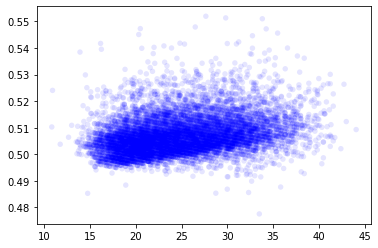

accuracy: 0.5115007970849464 baseline: 0.507173764518333
0    0.51868
dtype: float64


<Figure size 576x432 with 0 Axes>

In [75]:
RunLogisticModels(live)

In [81]:
RunSimpleRegression(live)

Intercept  6.83  0
agepreg  0.0175  5.72e-11
R^2 0.004738
Std(ys) 1.408
Std(res) 1.405


In [82]:
RunModels(live)

totalwgt_lb ~ isfirst
Intercept  7.33  0
isfirst[T.True]  -0.125  2.55e-05
R^2 0.00196
Std(ys) 1.408
Std(res) 1.407
totalwgt_lb ~ agepreg
Intercept  6.83  0
agepreg  0.0175  5.72e-11
R^2 0.004738
Std(ys) 1.408
Std(res) 1.405
totalwgt_lb ~ isfirst + agepreg
Intercept  6.91  0
isfirst[T.True]  -0.0698  0.0253
agepreg  0.0154  3.93e-08
R^2 0.005289
Std(ys) 1.408
Std(res) 1.405
totalwgt_lb~isfirst + agepreg + agepreg2
Intercept  5.69  1.38e-86
isfirst[T.True]  -0.0504  0.109
agepreg  0.112  3.23e-07
agepreg2  -0.00185  8.8e-06
R^2 0.007462
Std(ys) 1.408
Std(res) 1.403
\hline isfirst & agepreg & agepreg2 \\ \hline
-0.125 (*) & -- & -- & 0.002 \\
-- & 0.0175 (*) & -- & 0.0047 \\
-0.0698 0.025 & 0.0154 (*) & -- & 0.0053 \\
-0.0504 0.11 & 0.112 (*) & -0.00185 (*) & 0.0075 \\
\hline


In [83]:
PredictBirthWeight(live)

AttributeError: 'Series' object has no attribute 'join'